In [51]:
print("dataset: WINE")

dataset: WINE


In [52]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.cluster import KMeans

pd.options.mode.copy_on_write = True

In [53]:
# replace with current dataset
df = pd.read_csv('wine.csv')
df.head()

,Unnamed: 0,Cultivars,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    178 non-null    int64  
 1   Cultivars                     178 non-null    int64  
 2   Alcohol                       178 non-null    float64
 3   Malic acid                    178 non-null    float64
 4   Ash                           178 non-null    float64
 5   Alcalinity of ash             178 non-null    float64
 6   Magnesium                     178 non-null    int64  
 7   Total Phenols                 178 non-null    float64
 8   Flavanoids                    178 non-null    float64
 9   Nonflavanoid phenols          178 non-null    float64
 10  Proanthocyanins               178 non-null    float64
 11  Color intensity               178 non-null    float64
 12  Hue                           178 non-null    float64
 13  OD280

In [55]:
df = df.dropna()
df.info()

# establishing which 2 features to use
feature1 = "Alcohol"
feature2 = "Malic acid"

# in case 3 features will be tested
# feature3 = "flipper_length_mm"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    178 non-null    int64  
 1   Cultivars                     178 non-null    int64  
 2   Alcohol                       178 non-null    float64
 3   Malic acid                    178 non-null    float64
 4   Ash                           178 non-null    float64
 5   Alcalinity of ash             178 non-null    float64
 6   Magnesium                     178 non-null    int64  
 7   Total Phenols                 178 non-null    float64
 8   Flavanoids                    178 non-null    float64
 9   Nonflavanoid phenols          178 non-null    float64
 10  Proanthocyanins               178 non-null    float64
 11  Color intensity               178 non-null    float64
 12  Hue                           178 non-null    float64
 13  OD280

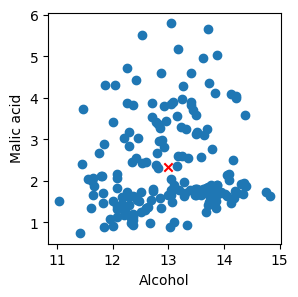

In [56]:
adjusted_df = df[[feature1, feature2]]
adjusted_df.head()

#plotting what the current dataset looks like
centroid = [adjusted_df[feature1].mean(), adjusted_df[feature2].mean()]

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(adjusted_df[feature1], adjusted_df[feature2])
ax.scatter(centroid[0], centroid[1], color='red', marker='x') 
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.show()

In [57]:
def calculate_euclidean_distance(p1, p2):
    return sum((p1[i] - p2[i]) ** 2 for i in range(len(p1))) ** 0.5

In [58]:
def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    for point in data:
        distances = [calculate_euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    return clusters


In [59]:
def compute_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        if cluster:  # Avoid division by zero
            new_centroid = [sum(dim) / len(cluster) for dim in zip(*cluster)]
            new_centroids.append(new_centroid)
        else:
            new_centroids.append(random.choice(cluster))  # Assign random point if cluster is empty
    return new_centroids

In [60]:
def plot_clusters(data, centroids, clusters, iteration):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    plt.figure(figsize=(6, 6))
    for i, cluster in enumerate(clusters):
        cluster_points = list(zip(*cluster))
        if cluster_points:
            plt.scatter(cluster_points[0], cluster_points[1], c=colors[i % len(colors)], label=f'Cluster {i+1}')
    centroid_points = list(zip(*centroids))
    plt.scatter(centroid_points[0], centroid_points[1], c='k', marker='x', s=100, label='Centroids')
    plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.show()

In [61]:
def elbow_method(data, max_k=10):
    inertia = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.plot(range(1, max_k+1), inertia, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()
    
    # Calculate second derivative to find the "elbow"
    deltas = np.diff(inertia)
    second_deltas = np.diff(deltas)
    optimal_k = np.argmax(second_deltas) + 2  # +2 because second_deltas index starts from k=2
    
    return optimal_k

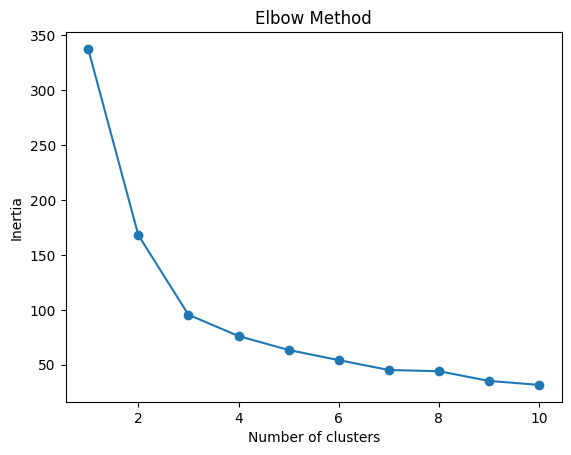

Optimal number of clusters: 2


In [62]:
optimal_k = elbow_method(adjusted_df)
print(f"Optimal number of clusters: {optimal_k}")

In [63]:
# K-Means Algorithm with visualization
def k_means(data, k, max_iters=100):
    centroids = random.sample(data, k)  # Randomly initialize centroids
    for i in range(max_iters):
        clusters = assign_clusters(data, centroids)
        plot_clusters(data, centroids, clusters, i+1)  # Plot each iteration
        new_centroids = compute_centroids(clusters)
        if new_centroids == centroids:
            break  # Stop if centroids do not change
        centroids = new_centroids
    return centroids, clusters

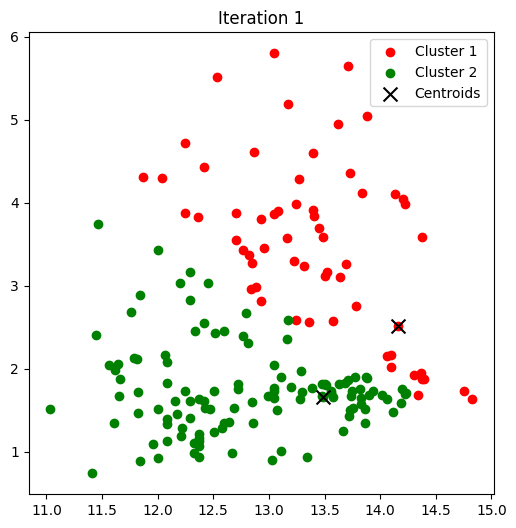

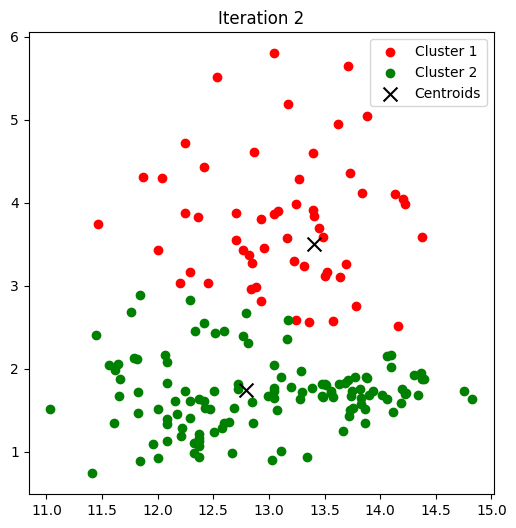

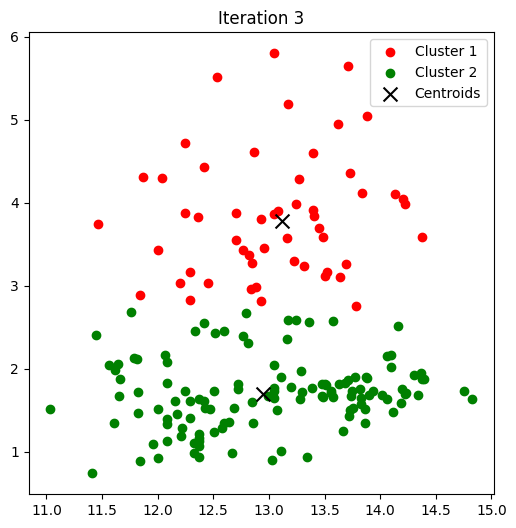

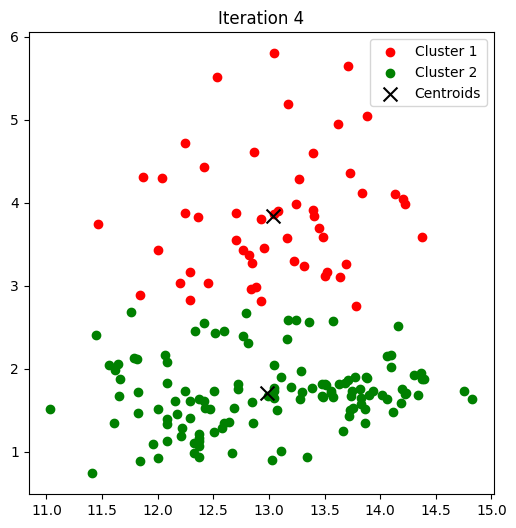

In [64]:
# Run k-means with optimal clusters
centroids, clusters = k_means(adjusted_df.values.tolist(), optimal_k)